<a href="https://colab.research.google.com/github/meliy-meyada/Tensorflow-Deep-Learning-and-Artificial-Intelligence/blob/main/TF2_0_CIFAR_Improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install Tensorflow
!pip install -q tensorflow-gpu
import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 5.8 MB 4.3 MB/s 
     |████████████████████████████████| 1.4 MB 62.0 MB/s 
     |████████████████████████████████| 462 kB 84.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.1 requires keras<2.10.0,>=2.9.0rc0, but you have keras 2.8.0 which is incompatible.
tensorflow 2.9.1 requires tensorboard<2.10,>=2.9, but you have tensorboard 2.8.0 which is incompatible.
tensorflow 2.9.1 requires tensorflow-estimator<2.10.0,>=2.9.0rc0, but you have tensorflow-estimator 2.8.0 which is incompatible.
2.9.1


In [2]:
# Additional imports

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalAveragePooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [3]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape: ", x_train.shape)
print("y_train.shape: ", y_train.shape)

x_train.shape:  (50000, 32, 32, 3)
y_train.shape:  (50000,)


In [4]:
# Number of classes
K = len(set(y_train))
print("Number of classes: ", K)

Number of classes:  10


In [5]:
# Build th model using the functional API

i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [6]:
# Compile 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Fit
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 15s 8ms/step - loss: 1.3144 - accuracy: 0.5478 - val_loss: 1.0793 - val_accuracy: 0.6329
Epoch 2/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8419 - accuracy: 0.7070 - val_loss: 0.8012 - val_accuracy: 0.7236
Epoch 3/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6905 - accuracy: 0.7624 - val_loss: 0.7528 - val_accuracy: 0.7450
Epoch 4/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5859 - accuracy: 0.7988 - val_loss: 0.6898 - val_accuracy: 0.7647
Epoch 5/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4972 - accuracy: 0.8314 - val_loss: 0.6650 - val_accuracy: 0.7852
Epoch 6/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.4215 - accuracy: 0.8555 - val_loss: 0.6499 - val_accuracy: 0.7898
Epoch 7/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.3540 - accuracy: 0.8771 - val_loss: 0.6412 - val_ac

In [8]:
# Fit with data augmentation

batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


1562/1562 [==============================] - 26s 17ms/step - loss: 0.5519 - accuracy: 0.8238 - val_loss: 0.4969 - val_accuracy: 0.8404
Epoch 2/50
1562/1562 [==============================] - 23s 15ms/step - loss: 0.4405 - accuracy: 0.8560 - val_loss: 0.4786 - val_accuracy: 0.8443
Epoch 3/50
1562/1562 [==============================] - 23s 15ms/step - loss: 0.3981 - accuracy: 0.8671 - val_loss: 0.4720 - val_accuracy: 0.8461
Epoch 4/50
1562/1562 [==============================] - 23s 15ms/step - loss: 0.3792 - accuracy: 0.8739 - val_loss: 0.4468 - val_accuracy: 0.8570
Epoch 5/50
1562/1562 [==============================] - 23s 15ms/step - loss: 0.3592 - accuracy: 0.8813 - val_loss: 0.4456 - val_accuracy: 0.8585
Epoch 6/50
1562/1562 [==============================] - 23s 15ms/step - loss: 0.3457 - accuracy: 0.8834 - val_loss: 0.4316 - val_accuracy: 0.8600
Epoch 7/50
1562/1562 [==============================] - 23s 15ms/step - loss: 0.3399 - accuracy: 0.8866 - val_loss: 0.4359 - val_accura

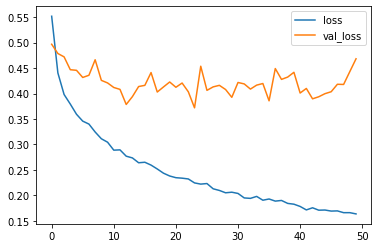

In [9]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

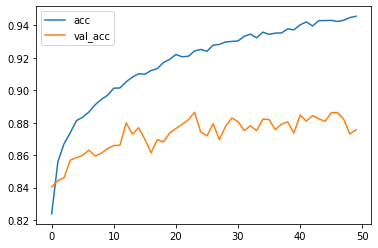

In [10]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[906  12  26   5   4   0   6   6  24  11]
 [  4 971   0   0   1   0   0   0   7  17]
 [ 28   3 838  18  43  17  35  11   4   3]
 [ 22   8  58 651  51  94  68  32   8   8]
 [ 11   1  20   6 898  13  22  28   0   1]
 [ 11   6  26  61  34 786  29  44   2   1]
 [  5   5  21   7   9   3 944   3   2   1]
 [  5   1   9   8  21  11   3 939   1   2]
 [ 36  27   5   0   5   0   4   2 901  20]
 [ 10  51   1   3   2   0   1   3   6 923]]


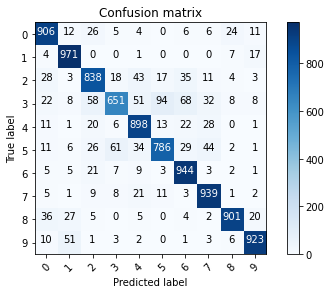

In [11]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title="Confusion matrix",
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting normalize=True 
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")
  
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [12]:
# Labels mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frong
horse
ship
truck'''.split()

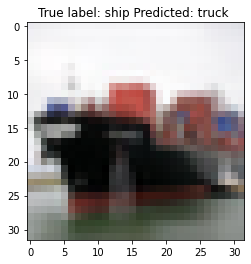

In [14]:
# Show some misclassified 
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s " % (labels[y_test[i]], labels[p_test[i]]));

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0     